In [60]:
# Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path

# File to Load 
total_data_to_load = Path("fraud test.csv")

# Read data and store into Pandas DataFrames
total_data_df = pd.read_csv(total_data_to_load)
total_data_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data clean and plot the horizontal bar graph

In [61]:

# Define variables for data of total transactions
clean_total_df = total_data_df[['amt']]
clean_total_df.head()


,amt
0,2.86
1,29.84
2,41.28
3,60.05
4,3.19


In [62]:
# Establish the bins for data set of total transactions
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
labels = ["A(<50)", "B(50-100)","C(100-200)", "D(200-300)", "E(300-400)", "F(400-500)", "G(500-600)", "H(600-700)", "I(700-800)", "J(800-900)", "K(900-1000)", "L(1000-1500)"]
# Slice the data and place it into bins
pd.cut(clean_total_df["amt"], bins, labels=labels,right=False).head()


0       A(<50)
1       A(<50)
2       A(<50)
3    B(50-100)
4       A(<50)
Name: amt, dtype: category
Categories (12, object): ['A(<50)' < 'B(50-100)' < 'C(100-200)' < 'D(200-300)' ... 'I(700-800)' < 'J(800-900)' < 'K(900-1000)' < 'L(1000-1500)']

In [63]:
# Create a data frame 
clean_total_df['amt_group'] = pd.cut(clean_total_df['amt'], bins, labels=labels,right=False)
clean_total_df.head()

C:\Users\Yi\AppData\Local\Temp\ipykernel_38100\3927477682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_total_df['amt_group'] = pd.cut(clean_total_df['amt'], bins, labels=labels,right=False)


,amt,amt_group
0,2.86,A(<50)
1,29.84,A(<50)
2,41.28,A(<50)
3,60.05,B(50-100)
4,3.19,A(<50)


In [64]:
# Count number of transactions for each group of amount
group_total_df = clean_total_df.groupby("amt_group").count()

C:\Users\Yi\AppData\Local\Temp\ipykernel_38100\3061489200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_total_df = clean_total_df.groupby("amt_group").count()


In [65]:
# Rename the column of count
group_total_df = group_total_df.rename(columns={'amt':'count'})
group_total_df

,count
amt_group,
A(<50),288883
B(50-100),166835
C(100-200),74648
D(200-300),13205
E(300-400),3477
F(400-500),2593
G(500-600),1912
H(600-700),842
I(700-800),632


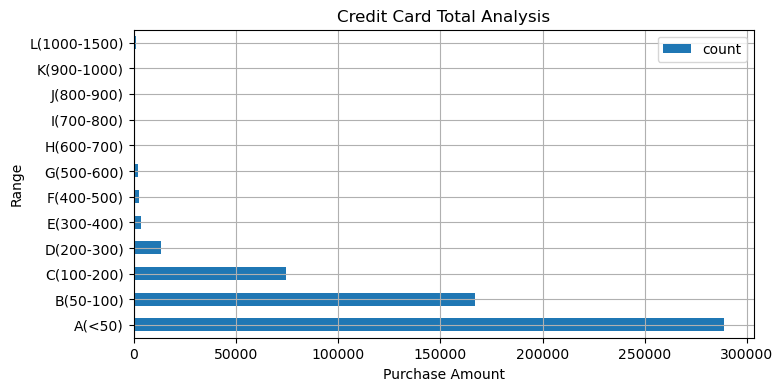

In [66]:
# Plot horizontal bar graph
# Set labels for axes
group_total_df.plot.barh(figsize=(8,4))

plt.xlabel('Purchase Amount')
plt.ylabel('Range')
plt.title('Credit Card Total Analysis')
plt.grid()
plt.show()

In [67]:
# Define variables for data of fraud transactions
is_fraud_df = total_data_df.loc[total_data_df["is_fraud"]==1]
is_fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [68]:
# Extract required columns
reduced_column_df = is_fraud_df[["amt"]]
reduced_column_df.head()

,amt
1685,24.84
1767,780.52
1781,620.33
1784,1077.69
1857,842.65


In [69]:
# Reset the index 
clean_fraud_df = reduced_column_df.reset_index(drop=True)
clean_fraud_df.head()

,amt
0,24.84
1,780.52
2,620.33
3,1077.69
4,842.65


In [70]:
# Establish the bins for data set of fraud transactions
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
labels = ["A(<50)", "B(50-100)","C(100-200)", "D(200-300)", "E(300-400)", "F(400-500)", "G(500-600)", "H(600-700)", "I(700-800)", "J(800-900)", "K(900-1000)", "L(1000-1500)"]
# Slice the data and place it into bins
pd.cut(clean_fraud_df["amt"], bins, labels=labels,right=False)


0             A(<50)
1         I(700-800)
2         H(600-700)
3       L(1000-1500)
4         J(800-900)
            ...     
2140    L(1000-1500)
2141      J(800-900)
2142    L(1000-1500)
2143      D(200-300)
2144      I(700-800)
Name: amt, Length: 2145, dtype: category
Categories (12, object): ['A(<50)' < 'B(50-100)' < 'C(100-200)' < 'D(200-300)' ... 'I(700-800)' < 'J(800-900)' < 'K(900-1000)' < 'L(1000-1500)']

In [71]:
# Place the data series into a new column inside of the DataFrame
clean_fraud_df["amt_group"] = pd.cut(clean_fraud_df["amt"], bins, labels=labels,right=False)
clean_fraud_df.head()

,amt,amt_group
0,24.84,A(<50)
1,780.52,I(700-800)
2,620.33,H(600-700)
3,1077.69,L(1000-1500)
4,842.65,J(800-900)


In [72]:
# Create a GroupBy object based upon "Amount Group"
# Check how many rows in each bin
group_fraud_df = clean_fraud_df.groupby("amt_group").count()

C:\Users\Yi\AppData\Local\Temp\ipykernel_38100\2542474631.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_fraud_df = clean_fraud_df.groupby("amt_group").count()


In [73]:
# Rename the column of count
group_fraud_df = group_fraud_df.rename(columns = {'amt':'count'})
group_fraud_df

,count
amt_group,
A(<50),462
B(50-100),18
C(100-200),54
D(200-300),212
E(300-400),340
F(400-500),23
G(500-600),31
H(600-700),47
I(700-800),165


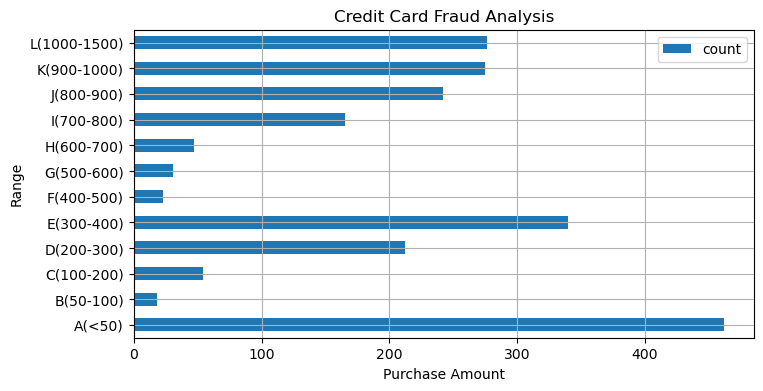

In [74]:
# Plot horizontal bar graph
# Set labels for axes
group_fraud_df.plot.barh(figsize=(8,4))

plt.xlabel('Purchase Amount')
plt.ylabel('Range')
plt.title('Credit Card Fraud Analysis')
plt.grid()
plt.show()

# Statistical analysis and data visualization

In [75]:
# Null hypothesis (H0): No significant count difference of purchase amount among each group
# Alternative hypothesis (Ha): Opposite to Null hypothesis

#One Sample T - Tests

To compare the mean of sample mean to the mean of population

In [76]:
# Display mean of count for each group of total dataset
mean_total_df = group_total_df['count'].groupby('amt_group').mean()
mean_total_df

C:\Users\Yi\AppData\Local\Temp\ipykernel_38100\1206743642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total_df = group_total_df['count'].groupby('amt_group').mean()


amt_group
A(<50)          288883.0
B(50-100)       166835.0
C(100-200)       74648.0
D(200-300)       13205.0
E(300-400)        3477.0
F(400-500)        2593.0
G(500-600)        1912.0
H(600-700)         842.0
I(700-800)         632.0
J(800-900)         582.0
K(900-1000)        527.0
L(1000-1500)       976.0
Name: count, dtype: float64

In [78]:
# Display mean of count for each group of fraud dataset
mean_fraud_df = group_fraud_df['count'].groupby('amt_group').mean()
mean_fraud_df

C:\Users\Yi\AppData\Local\Temp\ipykernel_38100\2022871320.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_fraud_df = group_fraud_df['count'].groupby('amt_group').mean()


amt_group
A(<50)          462.0
B(50-100)        18.0
C(100-200)       54.0
D(200-300)      212.0
E(300-400)      340.0
F(400-500)       23.0
G(500-600)       31.0
H(600-700)       47.0
I(700-800)      165.0
J(800-900)      242.0
K(900-1000)     275.0
L(1000-1500)    276.0
Name: count, dtype: float64

In [ ]:
stats.ttest_ind(mean_fraud_df,mean_total_df)

TtestResult(statistic=-1.7513732510325173, pvalue=0.09381328199442335, df=22.0)

In [ ]:
# Null hypothesis is accepted due to p value=0.09 > 0.05 indicating no significant difference between two data sets

#Chi_square



In [ ]:
# The degree of freedom is 12-1 = 11
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95
critical_value = stats.chi.ppf(q = 0.95, df = 11)
# The critical_value
critical_value

4.4356665308251575

In [82]:
# Merge two data frame
combine_df = pd.merge(group_total_df, group_fraud_df, on="amt_group")
combine_df

,count_x,count_y
amt_group,,
A(<50),288883,462
B(50-100),166835,18
C(100-200),74648,54
D(200-300),13205,212
E(300-400),3477,340
F(400-500),2593,23
G(500-600),1912,31
H(600-700),842,47
I(700-800),632,165


In [84]:
# Rename the column 
combine_df = combine_df.rename(columns={'count_x':'count_total','count_y':'count_fraud'})
combine_df

,count_total,count_fraud
amt_group,,
A(<50),288883,462
B(50-100),166835,18
C(100-200),74648,54
D(200-300),13205,212
E(300-400),3477,340
F(400-500),2593,23
G(500-600),1912,31
H(600-700),842,47
I(700-800),632,165
